# 텐서플로우(Tensorflow 2)

* 구글에서 만들고 있는 머신러닝 라이브러리(주로 딥러닝에 사용됨)

## 텐서플로우 기초

In [16]:
import tensorflow as tf
import numpy as np

In [17]:
print(tf.__version__)

2.4.0


## 난수 생성(Random)

- 신경망? => "숫자로 구성된 행렬"
  - 입력 => [행렬 계산] => 결과
  - 초기값은 '랜덤'으로 입력
- 참고 : https://reniew.github.io/13/


In [18]:
# 균일(uniform)분포
# 균일 분포란? 최솟값과 최댓값 사이의 모든 수가 나올 확률이 '동일한 분포'
rand = tf.random.uniform([5, 10], 0, 1) # 행렬 모양, 최솟값, 최댓값
print(rand)

tf.Tensor(
[[0.8667767  0.47292793 0.89282846 0.7485064  0.67149365 0.6692269
  0.18435681 0.1886419  0.0270617  0.75055885]
 [0.73353004 0.40168977 0.7685822  0.02987897 0.55972755 0.96315646
  0.87483144 0.01403368 0.42556417 0.76374745]
 [0.84733856 0.31662452 0.47706902 0.80647886 0.7005918  0.07349968
  0.4665599  0.80218804 0.4553249  0.5960517 ]
 [0.62848675 0.12368679 0.6013894  0.659099   0.75649273 0.5079417
  0.347579   0.892107   0.05449462 0.8981695 ]
 [0.49213612 0.32834184 0.08502424 0.54085314 0.50823176 0.10360551
  0.22814667 0.5914184  0.8307452  0.6332543 ]], shape=(5, 10), dtype=float32)


In [19]:
# 정규(normal)분포
rand = tf.random.normal([1], 0, 1) # 행렬 모양, 평균, 분산
print(rand)

tf.Tensor([-1.0853583], shape=(1,), dtype=float32)


### 뉴런

- 뉴런과 레이어 : 뉴런이 하나 또는 그 이상 있으면 레이어
  - 입력 -> 뉴런 -> 출력
  - 입력 -> [뉴런, 뉴런, 뉴런, 뉴런, 뉴런] -> 출력
  - 입력 -> [[뉴런, 뉴런, 뉴런, 뉴런, 뉴런][뉴런, 뉴런, 뉴런, 뉴런, 뉴런]] -> 출력
- 뉴런의 구성요소
  - 입력(X)
  - 가중치(w)
  - 편향(b, bias)
  - 활성화 함수(f)
    - 시그모이드(Sigmoid)
    - ReLU(Rectified Linear Unit)
  - 출력(Y)

- 활성화 함수의 종류
  - https://hackernoon.com/everything-you-need-to-know-about-neural-networks-8988c3ee4491

### AND

- [0, 0] = 0
- [0, 1] = 0
- [1, 0] = 0
- [1, 1] = 1

In [20]:
def sigmoid(x):
  return (1 / (1+np.exp(-x)))

In [21]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])
w = tf.random.normal([2], 0, 1) # X에 맞게
b = tf.random.normal([1], 0, 1) # bias니까 1개
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j] * w) + b_x + b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error
  if i % 400 == 0:
    print(f"{i}\tError{error_sum}")

print(w)
print(b)

0	Error[-1.1473565]
400	Error[-0.06776711]
800	Error[-0.03671442]
1200	Error[-0.02501717]
1600	Error[-0.01892013]
tf.Tensor([6.966415  6.9632506], shape=(2,), dtype=float32)
tf.Tensor([-11.615162], shape=(1,), dtype=float32)


In [22]:
for i in range(4):
  print(f"X: {x[i]}, Y: {y[i]}, output: {sigmoid(np.sum(x[i]*w+b))}")

X: [0 0], Y: [0], output: 8.150768634814872e-11
X: [0 1], Y: [0], output: 8.615887783231156e-08
X: [1 0], Y: [0], output: 8.643194746043923e-08
X: [1 1], Y: [1], output: 9.13557233959242e-05


### OR

In [23]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])
w = tf.random.normal([2], 0, 1) 
b = tf.random.normal([1], 0, 1) 
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j] * w) + b_x + b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error
  if i % 400 == 0:
    print(f"{i}\tError{error_sum}")

print(w)
print(b)

0	Error[-0.6888475]
400	Error[-0.02617887]
800	Error[-0.01314221]
1200	Error[-0.00871451]
1600	Error[-0.00650217]
tf.Tensor([8.206707 8.207437], shape=(2,), dtype=float32)
tf.Tensor([-4.635409], shape=(1,), dtype=float32)


In [24]:
for i in range(4):
  print(f"X: {x[i]}, Y: {y[i]}, output: {sigmoid(np.sum(x[i]*w+b))}")

X: [0 0], Y: [0], output: 9.412263867302521e-05
X: [0 1], Y: [1], output: 0.25666384197800657
X: [1 0], Y: [1], output: 0.25652466684484687
X: [1 1], Y: [1], output: 0.9992105038106682


### XOR

In [25]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
w = tf.random.normal([2], 0, 1) 
b = tf.random.normal([1], 0, 1) 
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j] * w) + b_x + b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error
  if i % 400 == 0:
    print(f"{i}\tError{error_sum}")

print(w)
print(b)

0	Error[0.45464897]
400	Error[-0.00011075]
800	Error[0.]
1200	Error[-2.3841858e-07]
1600	Error[-1.1920929e-07]
tf.Tensor([-0.10256401 -0.05128208], shape=(2,), dtype=float32)
tf.Tensor([-0.94871765], shape=(1,), dtype=float32)


In [26]:
for i in range(4):
  print(f"X: {x[i]}, Y: {y[i]}, output: {sigmoid(np.sum(x[i]*w+b))}")

X: [0 0], Y: [0], output: 0.13039902692193425
X: [0 1], Y: [1], output: 0.1246932913033833
X: [1 0], Y: [1], output: 0.11920298825972614
X: [1 1], Y: [0], output: 0.11392295661501356


### XOR(텐서플로우를 이용해서 풀어보자)

- 딥러닝
  - Layer를 구성하는게 가장 중요한 일
  - 최적의 'w', 'b'를 결정


In [27]:
# 입력과 출력
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# 레이어를 설계
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units = 2, activation = 'sigmoid', input_shape = (2,)), # input_shape 별도 표기
  tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
                
])

# 레이어를 컴파일
model.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.1), loss = 'mse')

# 레이어 확인
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [28]:
# 학습
history = model.fit(x, y, epochs = 2000, batch_size = 1)

Epoch 1/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2774
Epoch 2/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2037
Epoch 3/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2788
Epoch 4/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2699
Epoch 5/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2227
Epoch 6/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2814
Epoch 7/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2645
Epoch 8/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2892
Epoch 9/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2619
Epoch 10/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2553
Epoch 11/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2259
Epoch 12/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2647
Epoch 13/2000
4/4 [==============================

In [29]:
model.predict(x)

array([[0.21858752],
       [0.85557926],
       [0.77766186],
       [0.18417707]], dtype=float32)

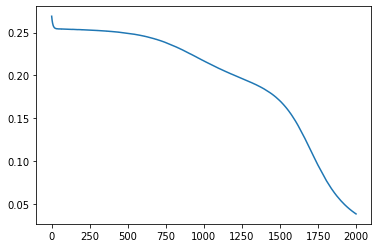

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

# Review

## XOR

In [31]:
import numpy as np
import tensorflow as tf

In [32]:
print(tf.__version__)

2.4.0


In [33]:
def sigmoid(x):
  return (1 / (1 + np.exp(-x)))

In [34]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w) + b_x + b)
    error = y[j][0] - output
    w = w + x[j]*0.1*error
    b = b + b_x *0.1*error
    error_sum += error

print(w)
print(b)

tf.Tensor([-0.10256401 -0.05128208], shape=(2,), dtype=float32)
tf.Tensor([-0.94871765], shape=(1,), dtype=float32)


In [35]:
for i in range(4):
  print(f"X: {x[i]}, Y: {y[i]}, output: {sigmoid(np.sum(x[i]*w+b))}")

X: [0 0], Y: [0], output: 0.13039902692193425
X: [0 1], Y: [1], output: 0.1246932913033833
X: [1 0], Y: [1], output: 0.11920298825972614
X: [1 1], Y: [0], output: 0.11392295661501356


## XOR(Tensorflow 사용)

In [36]:
# 입력, 출력 
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 2, activation = 'sigmoid', input_shape = [2,] ),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

# 레이어를 컴파일
model.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.1), loss = 'mse')

# 레이어 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


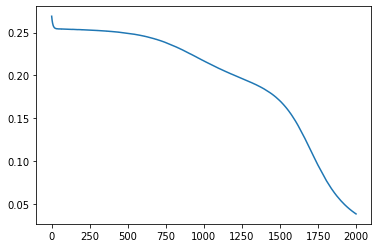

In [37]:
model.predict(x)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
